# **Exercise 3, Advanced Deep Learning**

Eetu Karttunen

Apply the CNN implementation with suitable node function from Exercise 1 to MNIST dataset, select one optimizer out of four (SGD, RMSProp, AdaGrad and Adam) to plot training loss and validation loss by epoch, training accuracy and validation accuracy by epoch, display the best result you have with suitable optimizer parameters and explain why you select that specific number to your optimizer?

**Answer:**

I chose RMSProp as the optimizer in this task, based on the second exercise, where it had the best performance. I also chose ELU as the activation function, based on the first assignment results. So everything is optimized as best as I could. With this two, at best it was possible to keep the loss under 0.13 and accuracy over 0.960.

The **learning rate** of 0.001 gave the best results in my case. Also other values bigger than 0.001 gave worse accuracy and bigger loss. Also smaller values gave worse results.

The **RHO** 0.95 gave better results than 0.9, making loss to be 0.12 and accuracy same or just a bit better than 0.960. Changing the value to 0.99 gave even better results of under 0.12 loss and almost 0.965 accuracy. I decided to keep the RHO of 0.99.

The **epsilon** value I decided to keep at 1e-05, because there I saw it to provide the best results in my case. It took some time to figure out what could be the best but having it higher or smaller did not make significant differencce after having the Learning rate and RHO set just right.





Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1252 - accuracy: 0.9610 - val_loss: 0.0656 - val_accuracy: 0.9793
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0444 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0416 - val_accuracy: 0.9877
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0256 - accuracy: 0.9921 - val_loss: 0.0361 - val_accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0425 - val_accuracy: 0.9879
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0401 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0137 - accuracy: 0.9956 - val_loss: 0.0342 - val_acc

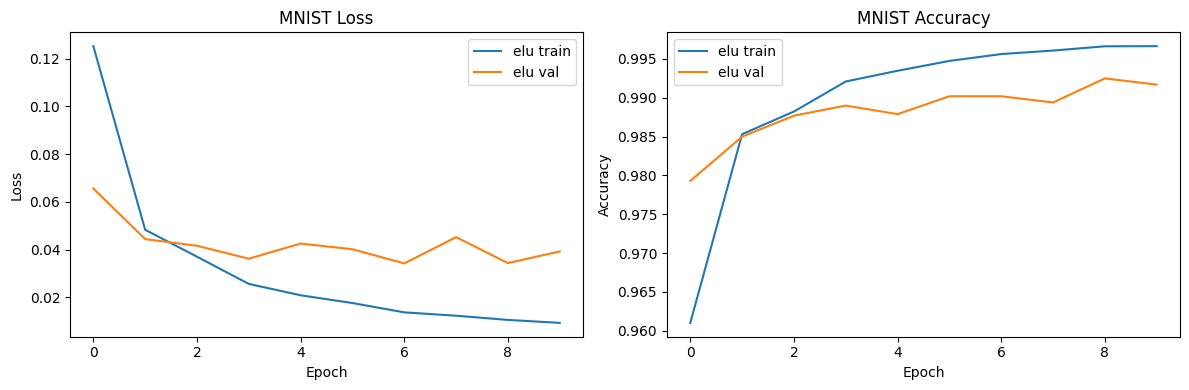

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.activations import sigmoid, tanh, relu, elu, selu
import numpy as np
import matplotlib.pyplot as plt

# Loading MNIST
mnist = keras.datasets.mnist
(trainImages, trainLabels), (testImages, testLabels) = mnist.load_data()

# Normalizing pixel values to be between 0 and 1
trainImages, testImages = trainImages / 255.0, testImages / 255.0

# Training with selected RMSProp optimizer
def buildAndTrainCnn(activationFunction, dataset, inputShape, numEpochs=10, optimizer='rmsprop', learning_rate=0.001, rho=0.9, epsilon=1e-07):
    model = keras.Sequential([
        Conv2D(32, (3, 3), activation=activationFunction, input_shape=inputShape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation=activationFunction),
        Flatten(),
        Dense(64, activation=activationFunction),
        Dense(10, activation='softmax')
    ])

    # Creating an instance of the RMSprop optimizer with my specified hyperparameters
    if optimizer.lower() == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate, rho=rho, epsilon=epsilon)
    elif optimizer.lower() != 'rmsprop':
        raise ValueError("Unsupported optimizer. Please choose 'rmsprop'.")

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(dataset[0], dataset[1], epochs=numEpochs,
                        validation_data=(dataset[2], dataset[3]))

    return history

# Using RMSProp optimizer for MNIST with custom hyperparameters
activationFunction = elu
mnistHistory = buildAndTrainCnn(
    activationFunction,
    (trainImages[..., np.newaxis], trainLabels, testImages[..., np.newaxis], testLabels),
    (28, 28, 1),
    optimizer='rmsprop',
    learning_rate=0.001,  # My desired learning rate based on
    rho=0.99,              # My desired rho value
    epsilon=1e-05         # My desired epsilon value
)
mnistResults = {activationFunction.__name__: mnistHistory}

# Plotting results
plotResults(mnistResults, 'MNIST')
